Soal Nomor 1
1. Buatlah histrogram dari citra dengan data berikut ini
120 129 122 121 125 130
124 128 125 123 129 129
127 123 122 128 121 125
122 126 124 127 139 120
128 128 123 120 129 121
128 127 124 122 121 126



In [2]:
#Import library
import numpy as np
import matplotlib.pyplot as plt

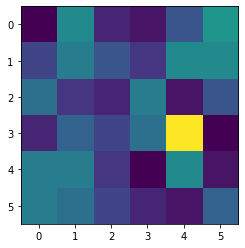

In [3]:
#Plotting gambar
arr = np.array([
              [120, 129, 122, 121, 125, 130], 
              [124, 128, 125, 123, 129, 129],
              [127, 123, 122, 128, 121, 125],
              [122, 126, 124, 127, 139, 120],
              [128, 128, 123, 120, 129, 121],
              [128, 127, 124, 122, 121, 126]
        ])
plt.imshow(arr)

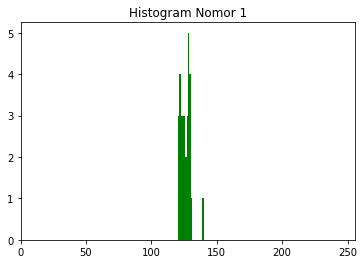

In [4]:
#Plotting histogram
plt.hist(arr.flatten(),256,[0,256], color = 'green')
plt.xlim([0,256])
plt.title("Histogram Nomor 1")
plt.show()

Soal Nomor 2 <br>
2. Berikut ini terdapat potongan citra dengan ukuran 10x10 piksel dengan rentang nilai 0-7
7 7 7 7 7 5 5 5 5 5
7 7 7 6 6 6 6 5 5 5
5 5 5 5 5 4 4 5 5 5
3 3 3 3 4 4 4 4 5 6
4 4 4 2 2 0 0 0 0 1
5 5 6 7 7 7 7 6 6 7
4 4 3 3 4 5 5 5 6 6
7 7 7 7 7 6 7 7 7 5
6 6 6 6 7 7 7 5 5 5
4 4 4 5 5 5 6 6 6 6

a. Lakukanlah histogram equalization pada citra tersebut.
b. Lakukan historgram specification pada citra tersebut dengan spesifikasi {0 : 5%, 1 : 5%, 2 : 10%, 3 : 15%, 4 : 20%, 5 : 25%, 6 : 15%, 7 : 5%}!

A.



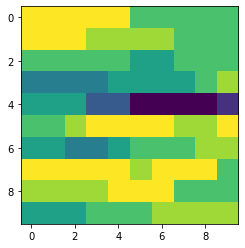

In [5]:
#Data awal dan plotting gambar
ehDataAwal = np.array([
              [7, 7, 7, 7, 7, 5, 5, 5, 5, 5],
              [7, 7, 7, 6, 6, 6, 6, 5, 5, 5],
              [5, 5, 5, 5, 5, 4, 4, 5, 5, 5],
              [3, 3, 3, 3, 4, 4, 4, 4, 5, 6],
              [4, 4, 4, 2, 2, 0, 0, 0, 0, 1],
              [5, 5, 6, 7, 7, 7, 7, 6, 6, 7],
              [4, 4, 3, 3, 4, 5, 5, 5, 6, 6],
              [7, 7, 7, 7, 7, 6, 7, 7, 7, 5],
              [6, 6, 6, 6, 7, 7, 7, 5, 5, 5],
              [4, 4, 4, 5, 5, 5, 6, 6, 6, 6]
            ])
plt.imshow(ehDataAwal)

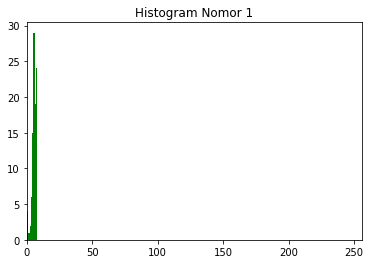

In [6]:
plt.hist(ehDataAwal.flatten(),256,[0,256], color = 'green')
plt.xlim([0,256])
plt.title("Histogram Nomor 1")
plt.show()


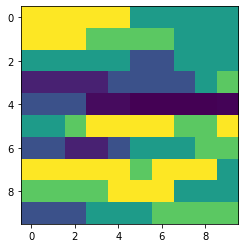

In [7]:
#Ambil data histogram
hist,bins = np.histogram(ehDataAwal, 256, [0,256])

#Proses histogram equalization
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
gambar_hasil = cdf[ehDataAwal]

#Plotting gambar hasil
plt.imshow(gambar_hasil)

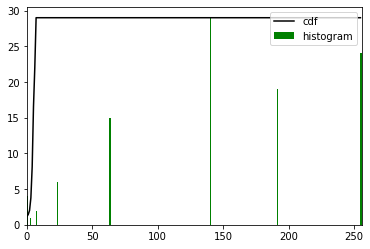

In [8]:
#Plotting hasil histogram equalization
plt.plot(cdf_normalized, color='black')
plt.hist(gambar_hasil.flatten(), 256, [0,256], color='green')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc= 'upper right')
plt.show()

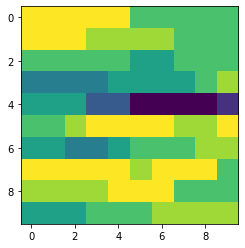

In [9]:
esDataAwal = np.array([
              [7, 7, 7, 7, 7, 5, 5, 5, 5, 5],
              [7, 7, 7, 6, 6, 6, 6, 5, 5, 5],
              [5, 5, 5, 5, 5, 4, 4, 5, 5, 5],
              [3, 3, 3, 3, 4, 4, 4, 4, 5, 6],
              [4, 4, 4, 2, 2, 0, 0, 0, 0, 1],
              [5, 5, 6, 7, 7, 7, 7, 6, 6, 7],
              [4, 4, 3, 3, 4, 5, 5, 5, 6, 6],
              [7, 7, 7, 7, 7, 6, 7, 7, 7, 5],
              [6, 6, 6, 6, 7, 7, 7, 5, 5, 5],
              [4, 4, 4, 5, 5, 5, 6, 6, 6, 6]
            ])

#Data awal coba dari PPT
# esDataAwal = np.array([
#                 [6,6,2,2,7,7],
#                 [6,6,5,5,7,6],
#                 [6,0,1,1,2,2],
#                 [7,0,1,0,2,2],
#                 [3,0,1,0,4,2],
#                 [6,6,3,6,1,2]
#             ])

definisiSpesifikasi = [
                [0,5],
                [1,5],
                [2,10],
                [3,10],
                [4,25],
                [5,5],
                [6,25],
                [7,15],
            ]

#kolom 1
tabel1 = []
length_table = esDataAwal.shape[0] * esDataAwal.shape[1]
for i in esDataAwal.flatten():
    if not i in tabel1:
        tabel1.append([i])
tabel1.sort()

#kolom 2
for i in range(0,len(tabel1)):
    a = list(esDataAwal.flatten())
    new_value = [tabel1[i], a.count(tabel1[i])]
    tabel1[i] = new_value

#kolom 3
for i in range(0,len(tabel1)):
    px = 0
    for j in range(0,i+1):
        px += tabel1[j][1]
    pxudu = px / length_table
    new_value = tabel1[i] + [pxudu]
    tabel1[i] = new_value

#Plotting gambar Awal Equalization Spesification
plt.imshow(esDataAwal)

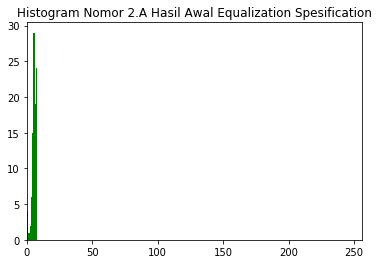

In [10]:
#Plotting histogram Awal Equalization Spesification
plt.hist(esDataAwal.flatten(),256,[0,256], color = 'green')
plt.xlim([0,256])
plt.title("Histogram Nomor 2.A Hasil Awal Equalization Spesification")
plt.show()

In [11]:
tabel2 = []
#kolom 1 dan 2
for i in range(0,len(definisiSpesifikasi)):
    z = definisiSpesifikasi[i][0]
    pz = definisiSpesifikasi[i][1]/100
    tabel2.append([z,pz])

#kolom 3
for i in range(0, len(tabel2)):
    pzudu = 0
    for j in range(0,i+1):
        pzudu += tabel2[j][1]
    tabel2[i] = tabel2[i] + [pzudu]

In [12]:
tabel3 = []
for i in esDataAwal.flatten():
    if not i in tabel3:
        tabel3.append([i])
tabel3.sort()

In [13]:
for i in range(0,len(tabel1)):
    kiri = tabel1[i][2]
    cari_terdekat = tabel2[np.abs(np.asarray([a[2] for a in tabel2])-kiri).argmin()]
    kanan = cari_terdekat[2]
    z = cari_terdekat[0]
    tengah = str(kiri) + ' = ' + str(kanan) 
    new_value = [tabel3[i], tengah, z] 
    tabel3[i] = new_value

In [14]:
esDataAkhir = np.array(esDataAwal[:])
for i in range(0,len(esDataAkhir)):
    for j in range(0, len(esDataAkhir[i])):
        index = -1;
        for jj in range(0,len(tabel3)):
            if esDataAkhir[i][j] == tabel3[jj][0]:
                index = jj
        esDataAkhir[i][j] = tabel3[index][2]

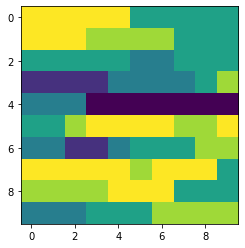

In [15]:
#Plotting gambar Akhir Equalization Spesification
plt.imshow(esDataAkhir)


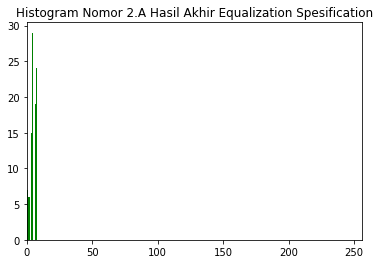

In [16]:
plt.hist(esDataAkhir.flatten(),256,[0,256], color = 'green')
plt.xlim([0,256])
plt.title("Histogram Nomor 2.A Hasil Akhir Equalization Spesification")
plt.show()